In [1]:
from onset_functions import *
import onset_widgets as w

# Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the data path and date range to load data:

In [13]:
# The path to where data is located / to be downloaded (by default the current directory)
data_path = f"{os.getcwd()}"

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 9)
enddate = datetime.date(2021, 10, 10)

# Set the averaging period, or leave to None to not resample data
# averaging should be a pandas-compatible string, e.g. '1h', '2min', '15s'
averaging = None #"1min"

In [14]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

# User may select which channels to plot for the TSA. Adjust the slider to find the path length that collapses the sudden increase in varying channels on top of each other. Use Normalize to normalize all channels to their maximum intensity.

In [15]:
# Select the channels to be plotted (first, last, step), end-exclusively (use None to choose all)
channels = (1, 11, 2)

INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234) [sunpy.coordinates.ephemeris]


FloatSlider(value=0.0, description='Path length L [AU]: ', max=1.55, step=0.05, style=SliderStyle(description_…

Checkbox(value=False, description='Normalize')

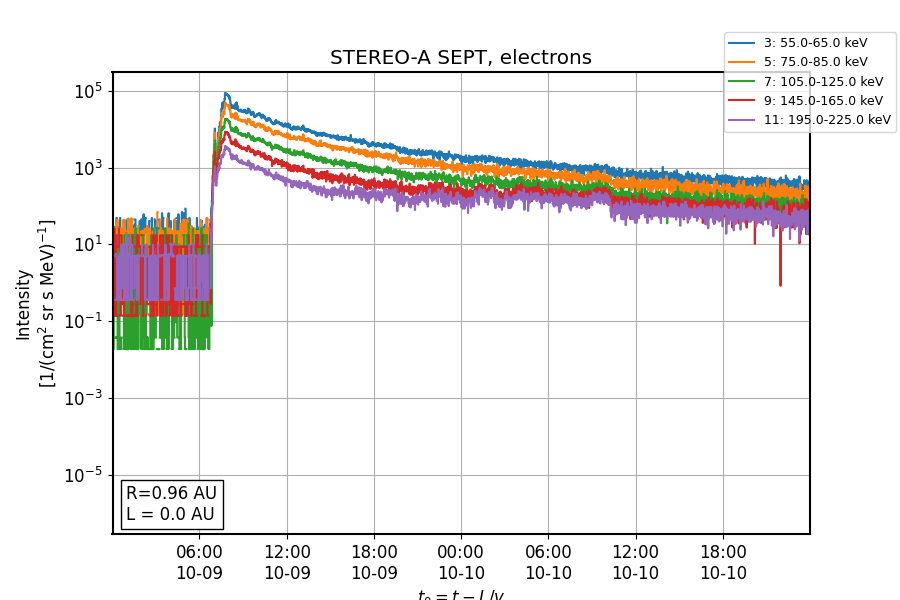

In [16]:
%matplotlib widget
Event_class.tsa_plot(w.view_drop.value, selection=channels, resample=averaging)

# Saving the figure is done in the plot window, by hovering mouse to the left side of the plot and clicking "Download plot"